In [14]:
import pandas as pd

df_new = pd.read_csv('one_hand_data.csv')

df_new['Mudra'] = ''

# Assign Mudra labels based on time ranges
time_column = df_new.columns[0]  # First column name (time)

# Map time ranges to Mudra labels
df_new.loc[df_new[time_column] < 32, 'Mudra'] = 'Bhumisparsa'
df_new.loc[(df_new[time_column] >= 35) & (df_new[time_column] < 48), 'Mudra'] = 'Varada'
df_new.loc[(df_new[time_column] >= 54) & (df_new[time_column] < 76), 'Mudra'] = 'Dhyana'
df_new.loc[(df_new[time_column] >= 80) & (df_new[time_column] < 96), 'Mudra'] = 'Abhaya'
df_new.loc[(df_new[time_column] >= 102) & (df_new[time_column] < 110), 'Mudra'] = 'Dharmachakra'
df_new.loc[(df_new[time_column] >= 112) & (df_new[time_column] < 122), 'Mudra'] = 'Vitarka'
df_new.loc[(df_new[time_column] >= 125) & (df_new[time_column] < 136), 'Mudra'] = 'Dharmachakra'
df_new.loc[(df_new[time_column] >= 140) & (df_new[time_column] < 153), 'Mudra'] = 'Tarjani'
df_new.loc[(df_new[time_column] >= 156) & (df_new[time_column] < 162), 'Mudra'] = 'Tarjani'
df_new.loc[(df_new[time_column] >= 167) & (df_new[time_column] < 181), 'Mudra'] = 'Namaskara'
df_new.loc[(df_new[time_column] >= 183) & (df_new[time_column] < 195), 'Mudra'] = 'Namaskara'
df_new.loc[(df_new[time_column] >= 199) & (df_new[time_column] < 220), 'Mudra'] = 'Jnana'
df_new.loc[(df_new[time_column] >= 224) & (df_new[time_column] < 243), 'Mudra'] = 'Karana'
df_new.loc[(df_new[time_column] >= 251) & (df_new[time_column] < 270), 'Mudra'] = 'Ksepana'
df_new.loc[(df_new[time_column] >= 278) & (df_new[time_column] < 283), 'Mudra'] = 'Ksepana'
df_new.loc[(df_new[time_column] >= 288) & (df_new[time_column] <= 311), 'Mudra'] = 'Uttarabodhi'

df_new.to_csv('one_hand_data+mudra_classification.csv', index=False)

In [ ]:
df_new = pd.read_csv('two_hand_data.csv')

df_new['Mudra'] = ''

# Assign Mudra labels based on time ranges
time_column = df_new.columns[0]  # First column name (time)

# Map time ranges to Mudra labels
df_new.loc[df_new[time_column] < 35, 'Mudra'] = 'Bhumisparsa'
df_new.loc[(df_new[time_column] >= 35) & (df_new[time_column] < 43), 'Mudra'] = 'Varada'
df_new.loc[(df_new[time_column] >= 44) & (df_new[time_column] < 53), 'Mudra'] = 'Dhyana'
df_new.loc[(df_new[time_column] >= 54) & (df_new[time_column] < 61), 'Mudra'] = 'Abhaya'
df_new.loc[(df_new[time_column] >= 62) & (df_new[time_column] < 74), 'Mudra'] = 'Dharmachakra'
df_new.loc[(df_new[time_column] >= 75) & (df_new[time_column] < 84), 'Mudra'] = 'Vitarka'
df_new.loc[(df_new[time_column] >= 85) & (df_new[time_column] < 95), 'Mudra'] = 'Tarjani'
df_new.loc[(df_new[time_column] >= 96) & (df_new[time_column] < 105), 'Mudra'] = 'Namaskara'
df_new.loc[(df_new[time_column] >= 106) & (df_new[time_column] < 119), 'Mudra'] = 'Jnana'
df_new.loc[(df_new[time_column] >= 120) & (df_new[time_column] < 131), 'Mudra'] = 'Karana'
df_new.loc[(df_new[time_column] >= 132) & (df_new[time_column] < 142), 'Mudra'] = 'Ksepana'
df_new.loc[(df_new[time_column] >= 143) & (df_new[time_column] <= 150), 'Mudra'] = 'Uttarabodhi'

df_new.to_csv('two_hand_data+mudra_classification', index=False)

In [ ]:
df_VR1_data = pd.read_csv('two_hand_data+mudra_classification.csv')
df_VR2_data = pd.read_csv('one_hand_data+mudra_classification.csv')

# Add a 'Source' column to identify the origin dataset
df_VR1_data['Source'] = 'two_hand'
df_VR2_data['Source'] = 'one_hand'

# Combine the two dataframes
df_combined = pd.concat([df_VR1_data, df_VR2_data], ignore_index=True)

df_combined.to_csv('combined_data_with_classification.csv', index=False)

In [ ]:
df_combined.head()

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df_combined = pd.read_csv('combined_data_with_classification.csv')
df_combined = df_combined.dropna(subset=['Mudra'])  # Drop rows without Mudra labels

# Drop non-numeric columns (keeping only motion data)
df_numeric = df_combined.select_dtypes(include=['number']).drop(columns=['Time'], errors='ignore')

# Normalizar os dados
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_numeric)

# Converter os dados para tensores do PyTorch
X_train, X_test = train_test_split(df_numeric, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

# Definição do Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim)  # Compressão para espaço latente
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)  # Reconstrução dos dados originais
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Criar modelo, definir otimizador e função de perda
input_dim = X_train.shape[1]
autoencoder = Autoencoder(input_dim, latent_dim=10)
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Treinar o Autoencoder
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    output = autoencoder(X_train_tensor)
    loss = criterion(output, X_train_tensor)  # Comparando reconstrução com entrada
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f'Época {epoch}, Loss: {loss.item():.4f}')



Época 0, Loss: 0.1780
Época 10, Loss: 0.1336
Época 20, Loss: 0.1025
Época 30, Loss: 0.0798
Época 40, Loss: 0.0665
Época 50, Loss: 0.0578
Época 60, Loss: 0.0507
Época 70, Loss: 0.0437
Época 80, Loss: 0.0372
Época 90, Loss: 0.0311
Época 100, Loss: 0.0258
Época 110, Loss: 0.0219
Época 120, Loss: 0.0192
Época 130, Loss: 0.0174
Época 140, Loss: 0.0160
Época 150, Loss: 0.0147
Época 160, Loss: 0.0134
Época 170, Loss: 0.0122
Época 180, Loss: 0.0111
Época 190, Loss: 0.0102
Época 200, Loss: 0.0092
Época 210, Loss: 0.0083
Época 220, Loss: 0.0074
Época 230, Loss: 0.0066
Época 240, Loss: 0.0058
Época 250, Loss: 0.0051
Época 260, Loss: 0.0046
Época 270, Loss: 0.0042
Época 280, Loss: 0.0039
Época 290, Loss: 0.0037
Época 300, Loss: 0.0035
Época 310, Loss: 0.0033
Época 320, Loss: 0.0032
Época 330, Loss: 0.0030
Época 340, Loss: 0.0029
Época 350, Loss: 0.0028
Época 360, Loss: 0.0027
Época 370, Loss: 0.0025
Época 380, Loss: 0.0024
Época 390, Loss: 0.0023
Época 400, Loss: 0.0022
Época 410, Loss: 0.0021
Épo

In [22]:
# Obter a representação latente
with torch.no_grad():
    X_train_latent = autoencoder.encoder(X_train_tensor).numpy()
    X_test_latent = autoencoder.encoder(X_test_tensor).numpy()


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Certifique-se de que você tem rótulos
y_train, y_test = train_test_split(df_combined['Mudra'], test_size=0.2, random_state=42)

# Treinar o modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_latent, y_train)

# Fazer previsões
y_pred = clf.predict(X_test_latent)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.9995782370307887
Relatório de classificação:
               precision    recall  f1-score   support

      Abhaya       1.00      1.00      1.00       330
 Bhumisparsa       1.00      1.00      1.00       356
Dharmachakra       1.00      1.00      1.00       429
      Dhyana       1.00      1.00      1.00       411
       Jnana       1.00      1.00      1.00       457
      Karana       1.00      1.00      1.00       441
     Ksepana       1.00      1.00      1.00       432
   Namaskara       1.00      1.00      1.00       480
     Tarjani       1.00      1.00      1.00       449
 Uttarabodhi       1.00      1.00      1.00       414
      Varada       1.00      1.00      1.00       232
     Vitarka       1.00      1.00      1.00       311

    accuracy                           1.00      4742
   macro avg       1.00      1.00      1.00      4742
weighted avg       1.00      1.00      1.00      4742



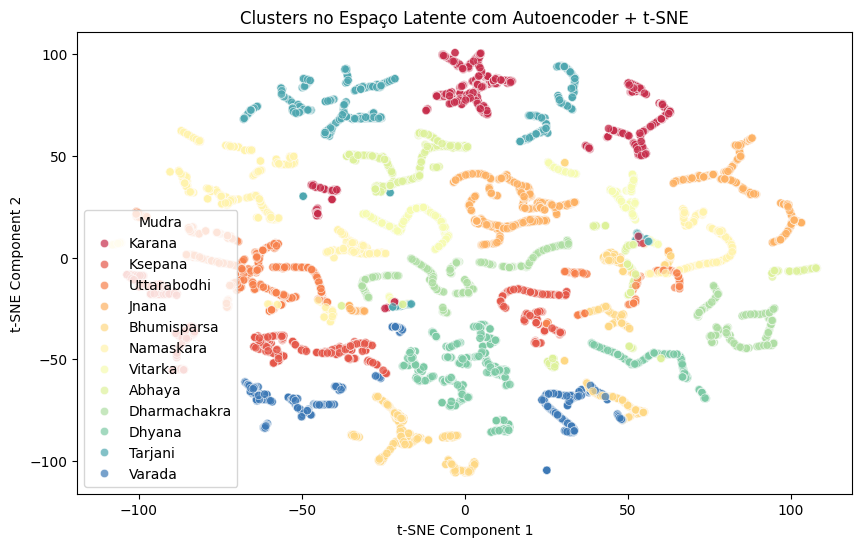

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne_latent = tsne.fit_transform(X_train_latent)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne_latent[:, 0], y=X_tsne_latent[:, 1], hue=y_train, palette="Spectral", alpha=0.7)
plt.title("Clusters no Espaço Latente com Autoencoder + t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# Normalizar os dados e salvar o scaler
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_numeric)
joblib.dump(scaler, 'scaler.joblib')

# Converter os dados para tensores do PyTorch
X_train, X_test, y_train, y_test = train_test_split(df_normalized, y_labels, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Definição do Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim)  # Compressão para espaço latente
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)  # Reconstrução dos dados originais
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Criar modelo, definir otimizador e função de perda
input_dim = X_train.shape[1]
autoencoder = Autoencoder(input_dim, latent_dim=10)
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Treinar o Autoencoder
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    output = autoencoder(X_train_tensor)
    loss = criterion(output, X_train_tensor)  # Comparando reconstrução com entrada
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f'Época {epoch}, Loss: {loss.item():.4f}')

# Salvar o Autoencoder como um arquivo .pth
torch.save(autoencoder.state_dict(), 'autoencoder.pth')

# Extrair representações latentes
X_train_latent = autoencoder.encoder(X_train_tensor).detach().numpy()
X_test_latent = autoencoder.encoder(X_test_tensor).detach().numpy()

# Treinar um classificador RandomForest com os dados latentes
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_latent, y_train)

# Salvar o classificador RandomForest
joblib.dump(clf, 'random_forest.joblib')
